# DBN with pyAGrum

This notebook was created based on this tutorial: http://www-desir.lip6.fr/~phw/aGrUM/docs/last/notebooks/32-dynamicBn.ipynb.html

In [1]:
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.dynamicBN as gdyn
%matplotlib inline

## Creating the BN model

In [2]:
twodbn = gum.BayesNet()

## Creating Nodes

Note the naming convention for a 2TBN : a variable with a name A is present at t=0 with the name A0 and at time t as At.(From the tutorial)

### Subjects nodes

In [3]:
# Subjects nodes
subjects_nodes = ['ca0', 'co0', 'h0', 'cat', 'cot', 'ht']

ca0, co0, h0, cat, cot, ht = [
    twodbn.add(gum.LabelizedVariable(s, s, 2)) 
    for s in subjects_nodes
]

print(ca0, co0, h0, cat, cot, ht)

0 1 2 3 4 5


### Evidences nodes

In [4]:
evidences_nodes = ['evca0', 'evco0', 'evh0', 'evhd0', 'evcat', 'evcot', 'evht', 'evhdt']

evca0, evco0, evh0, evhd0, evcat, evcot, evht, evhdt = [
    twodbn.add(gum.LabelizedVariable(s, s, 2)) 
    for s in evidences_nodes
]

print(evca0, evco0, evh0, evcat, evcot, evht, evhdt)

6 7 8 10 11 12 13


## Creating Arcs

### Subjects Arcs

In [5]:
twodbn.addArc(h0, ca0)
twodbn.addArc(h0, co0)
twodbn.addArc(ht, cat)
twodbn.addArc(ht, cot)

### Evidences Arcs

In [6]:
twodbn.addArc(ca0, evca0)
twodbn.addArc(co0, evco0)
twodbn.addArc(h0, evh0)
twodbn.addArc(h0, evhd0)
twodbn.addArc(cat, evcat)
twodbn.addArc(cot, evcot)
twodbn.addArc(ht, evht)
twodbn.addArc(ht, evhdt)

### Transitions Arcs

In [7]:
twodbn.addArc(ca0, cat)
twodbn.addArc(co0, cot)
twodbn.addArc(h0, ht)

twodbn.generateCPTs()

## Creating the CPTs for subjects, evidences and transitions

Method orders for probabilities
.fillWith([False, True])

### Subjects CPTs

In [8]:
twodbn.cpt(ca0).fillWith([0.468176, 0.531824])
twodbn.cpt(co0).fillWith([0.468176, 0.531824])
twodbn.cpt(h0)[{'ca0': 0, 'co0': 0}] = [0.908971, 0.091029]
twodbn.cpt(h0)[{'ca0': 0, 'co0': 1}] = [0.650269, 0.349731]
twodbn.cpt(h0)[{'ca0': 1, 'co0': 0}] = [0.650269, 0.349731]
twodbn.cpt(h0)[{'ca0': 1, 'co0': 1}] = [0.124852, 0.875148]

### Evidences CPTs

In [9]:
twodbn.cpt(evca0)[{'ca0': 0}] = [0.8, 0.2]
twodbn.cpt(evca0)[{'ca0': 1}] = [0.1, 0.9]

twodbn.cpt(evco0)[{'co0': 0}] = [0.8, 0.2]
twodbn.cpt(evco0)[{'co0': 1}] = [0.1, 0.9]

twodbn.cpt(evh0)[{'h0': 0}] = [0.8, 0.2]
twodbn.cpt(evh0)[{'h0': 1}] = [0.1, 0.9]

twodbn.cpt(evhd0)[{'h0': 0}] = [0.8, 0.2]
twodbn.cpt(evhd0)[{'h0': 1}] = [0.1, 0.9]

twodbn.cpt(evcat)[{'cat': 0}] = [0.8, 0.2]
twodbn.cpt(evcat)[{'cat': 1}] = [0.1, 0.9]

twodbn.cpt(evcot)[{'cot': 0}] = [0.8, 0.2]
twodbn.cpt(evcot)[{'cot': 1}] = [0.1, 0.9]

twodbn.cpt(evht)[{'ht': 0}] = [0.8, 0.2]
twodbn.cpt(evht)[{'ht': 1}] = [0.1, 0.9]

twodbn.cpt(evhdt)[{'ht': 0}] = [0.8, 0.2]
twodbn.cpt(evhdt)[{'ht': 1}] = [0.1, 0.9]

### Transitions CPTs

In [10]:
# Transitions CTPs
twodbn.cpt(cat)[{'ca0': 0}] = [0.919, 0.081]
twodbn.cpt(cat)[{'ca0': 1}] = [0.047, 0.953]

twodbn.cpt(cot)[{'co0': 0}] = [0.919, 0.081]
twodbn.cpt(cot)[{'co0': 1}] = [0.047, 0.953]

twodbn.cpt(ht)[{'cat': 0, 'cot': 0, 'h0': 0}] = [0.919, 0.081]
twodbn.cpt(ht)[{'cat': 0, 'cot': 0, 'h0': 1}] = [0.85, 0.15]
twodbn.cpt(ht)[{'cat': 0, 'cot': 1, 'h0': 0}] = [0.85, 0.15]
twodbn.cpt(ht)[{'cat': 0, 'cot': 1, 'h0': 1}] = [0.35, 0.65]
twodbn.cpt(ht)[{'cat': 1, 'cot': 0, 'h0': 0}] = [0.85, 0.15]
twodbn.cpt(ht)[{'cat': 1, 'cot': 0, 'h0': 1}] = [0.35, 0.65]
twodbn.cpt(ht)[{'cat': 1, 'cot': 1, 'h0': 0}] = [0.35, 0.65]
twodbn.cpt(ht)[{'cat': 1, 'cot': 1, 'h0': 1}] = [0.047, 0.953]

### Save DBN as a file

In [11]:
gum.saveBN(twodbn,os.path.join("out","DBN.bif"))

## Visualizing the DBN

### DBN with 0 and 1 time slices

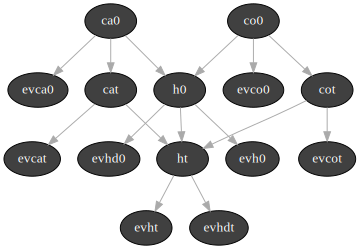

In [12]:
import pyAgrum.lib.notebook as gnb

gnb.forDarkTheme()

gnb.showBN(twodbn)

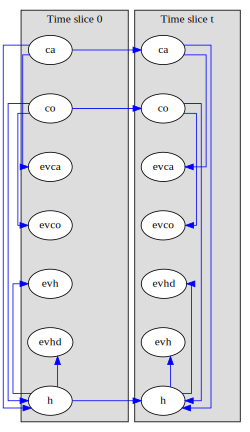

In [13]:
gdyn.showTimeSlices(twodbn)

### DBN expanded with 5 time slices

In [14]:
twodbn.cpt('co0')

(gum::Potential<double>@0x2f0ae80) <co0:0> :: 0.468176 /<co0:1> :: 0.531824

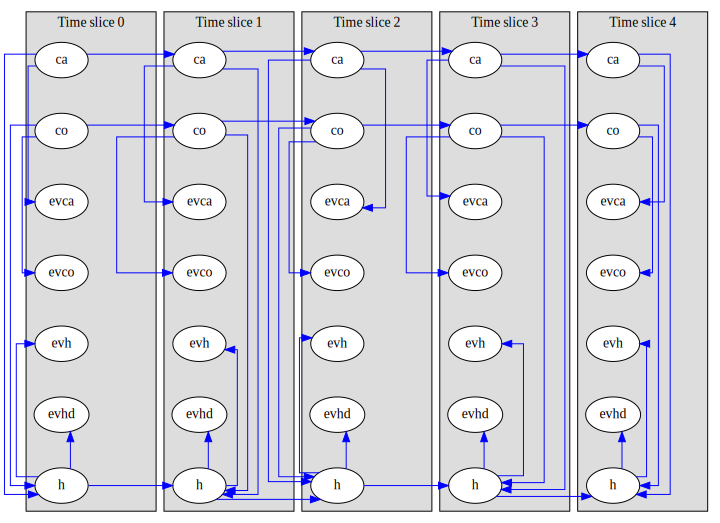

In [15]:
T=5

dbn = gdyn.unroll2TBN(twodbn,T)
gdyn.showTimeSlices(dbn,size="10")

## DBN Inference

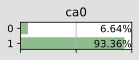

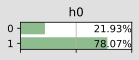

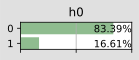

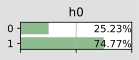

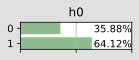

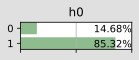

In [31]:
T = 5

#for i in range(T):
#    gnb.showPosterior(dbn,target="ca{}".format(i),evs={})
    
gnb.showPosterior(dbn, target="ca0", evs={'evca0': 1, 'h0': 1})
gnb.showPosterior(dbn, target="ca0", evs={'evca0': 1, 'h0': 1})
gnb.showPosterior(dbn, target="h0", evs={'evh0': 1})
gnb.showPosterior(dbn, target="h0", evs={'evh0': 0, 'ca0': [0.1636, 0.8364], 'evca0': 1})
gnb.showPosterior(dbn, target="h0", evs={'evh0': 1, 'ca0': [0.8757, 0.1243], 'evca0': 1})
gnb.showPosterior(dbn, target="h0", evs={'evh0': 1, 'ca0': [0.8757, 0.1243]})
gnb.showPosterior(dbn, target="h0", evs={'evh0': 1, 'evca0': 1})


### Following variables

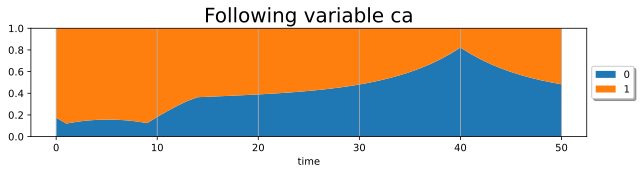

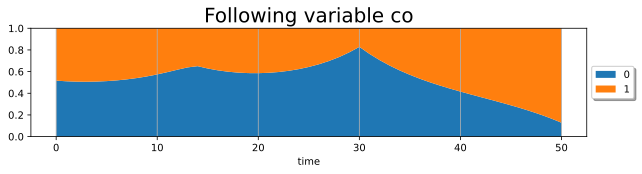

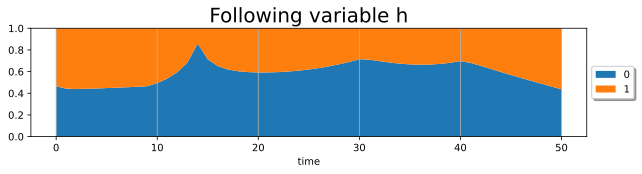

In [15]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 2)
gdyn.plotFollow(
    ["ca","co","h"],
    twodbn,
    T=51,
    evs={
        'evca1': 1,
        'evca9': 1,
        'evco30': 0,
        'evh14': 0,
        'evca40': 0,
        'evco50': 1
    }
)

## nsDBN (Non-Stationnary Dynamic Bayesian Network)

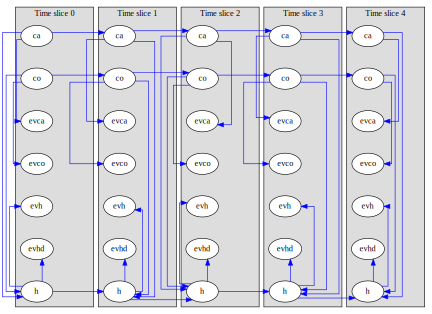

In [16]:
T = 5

dbn = gdyn.unroll2TBN(twodbn,T)
gdyn.showTimeSlices(dbn)

Non-stationnaty DBN allows to express that the dBN do not follow the same 2TBN during all steps. A unrolled dbn is a classical BayesNet and then can be changed as you want after unrolling. (Extracted from tutorial)

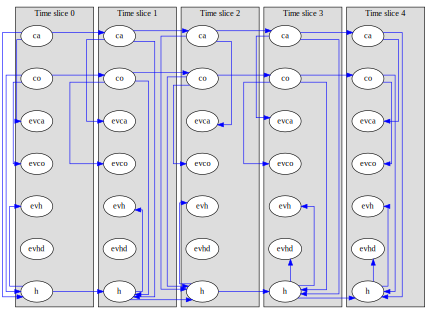

In [17]:
for i in range(3):
    dbn.eraseArc(f"h{i}",f"evhd{i}")

gum.saveBN(twodbn,os.path.join("out","DBN.bif"))
    
gdyn.showTimeSlices(dbn)

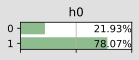

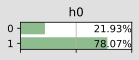

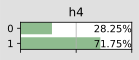

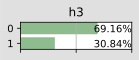

In [27]:
gnb.showPosterior(dbn, target="h0", evs={'evh0': 1, 'evhd0': 1})
gnb.showPosterior(dbn, target="h0", evs={'evh0': 1, 'evhd0': 0})

gnb.showPosterior(dbn, target="h4", evs={'evh0': 1, 'evh1': 1, 'evh2': 1, 'evh3': 1, 'evh4': 1, 'evhd4': 0})
gnb.showPosterior(dbn, target="h3", evs={'evh0': 1, 'evhd4': 0})